# House Prices - Advanced Regression (with EDA)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv',index_col='Id')
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',index_col='Id')
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## EDA

<Axes: xlabel='SalePrice', ylabel='Density'>

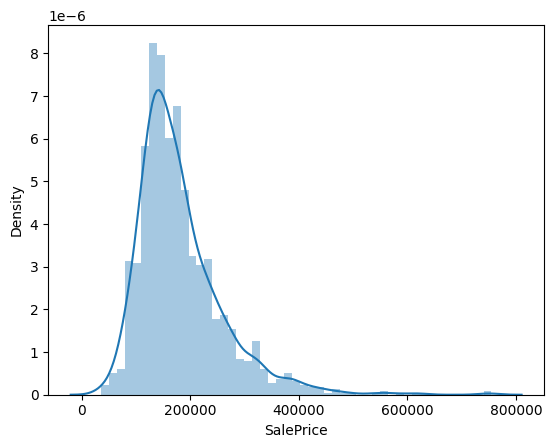

In [7]:
sns.distplot(train['SalePrice'])

<Axes: xlabel='SaleCondition', ylabel='count'>

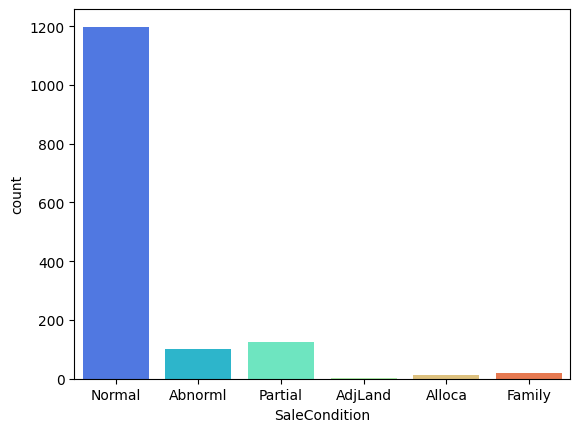

In [8]:
sns.countplot(data=train,x='SaleCondition',palette='rainbow')

<Axes: xlabel='SaleType', ylabel='count'>

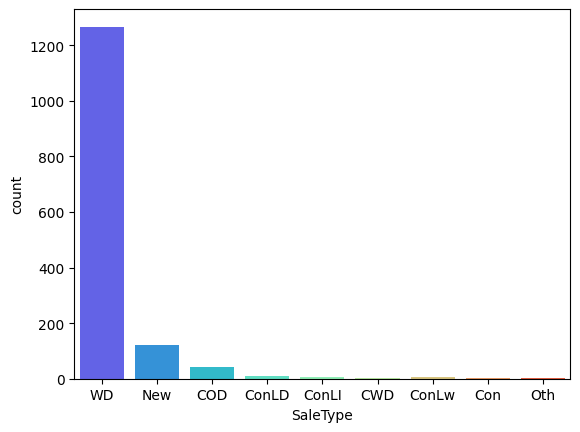

In [9]:
sns.countplot(data=train,x='SaleType',palette='rainbow')

<Axes: xlabel='YrSold'>

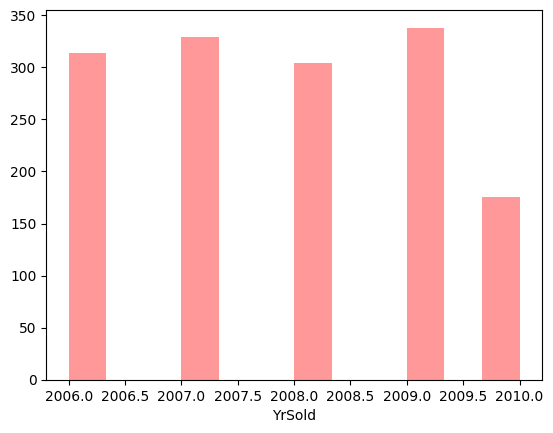

In [10]:
sns.distplot(train['YrSold'],kde=False,color='red')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

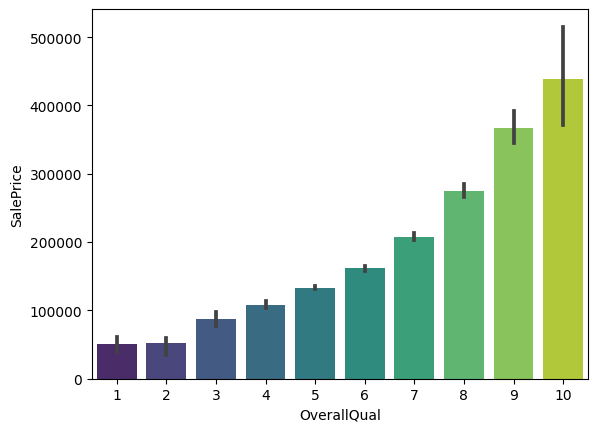

In [11]:
sns.barplot(data=train,x='OverallQual',y='SalePrice',palette='viridis')

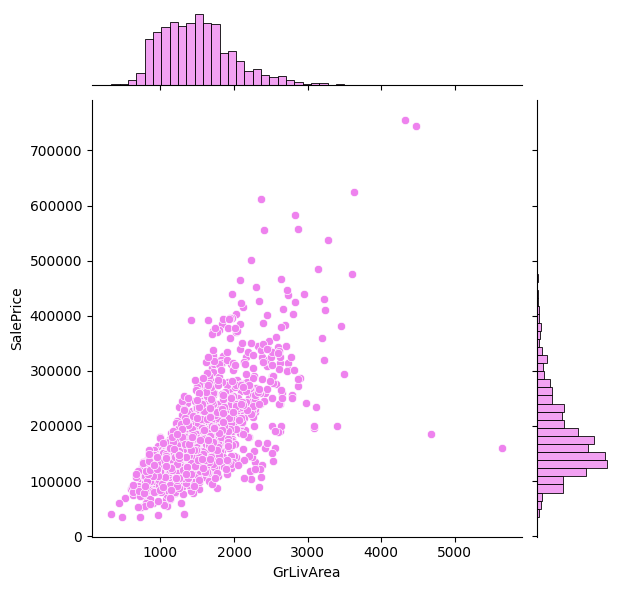

In [12]:
sns.jointplot(data=train,x='GrLivArea',y='SalePrice',color='violet')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

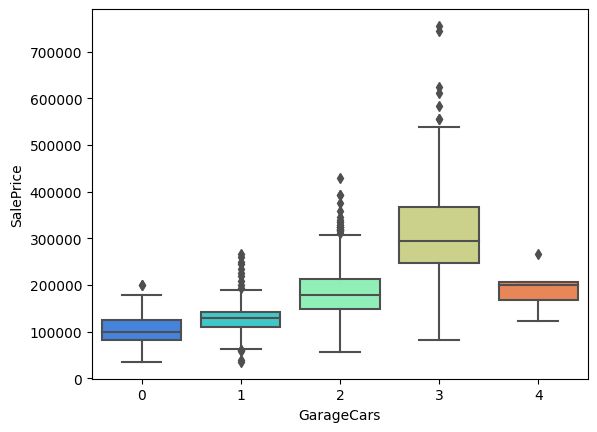

In [13]:
sns.boxplot(data=train,x='GarageCars',y='SalePrice',palette='rainbow')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

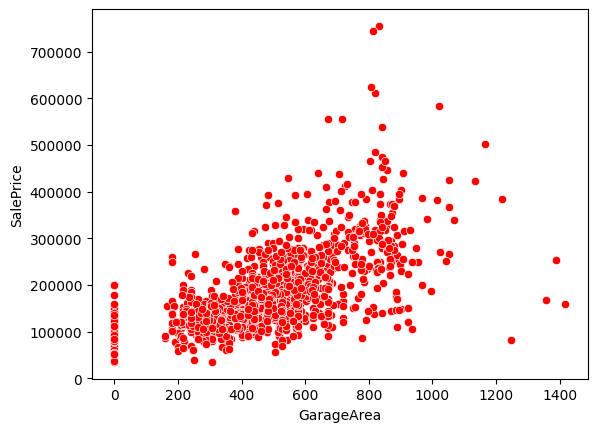

In [14]:
sns.scatterplot(data=train,x='GarageArea',y='SalePrice',color='red')

<Figure size 1200x500 with 0 Axes>

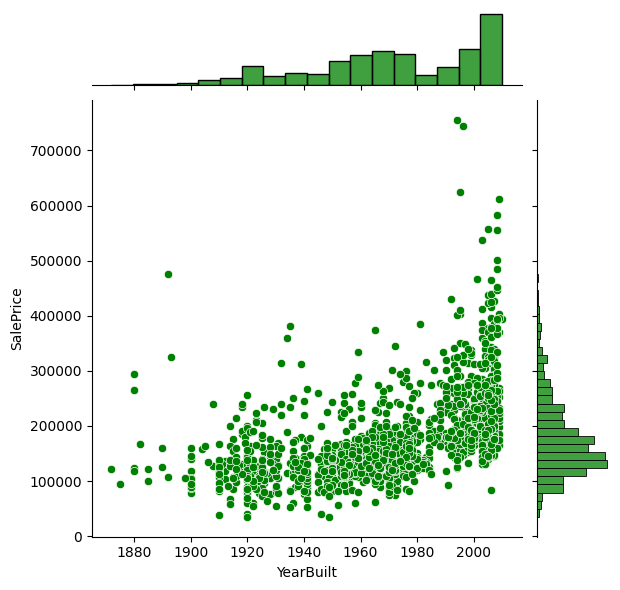

In [15]:
plt.figure(figsize=(12,5))
sns.jointplot(data=train,x='YearBuilt',y='SalePrice',color='green')

<Axes: >

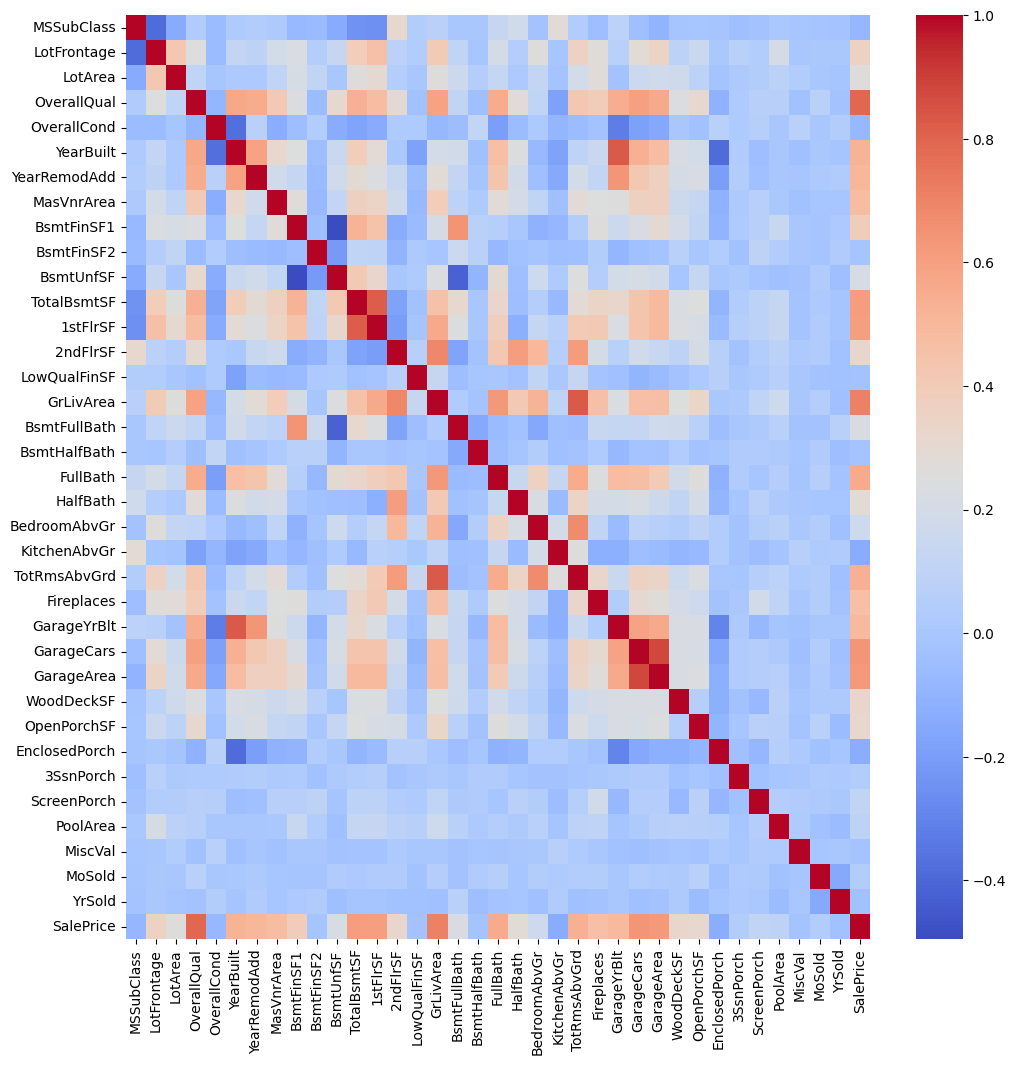

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(numeric_only=True),cmap='coolwarm')

## Data Preprocessing

<Axes: ylabel='Id'>

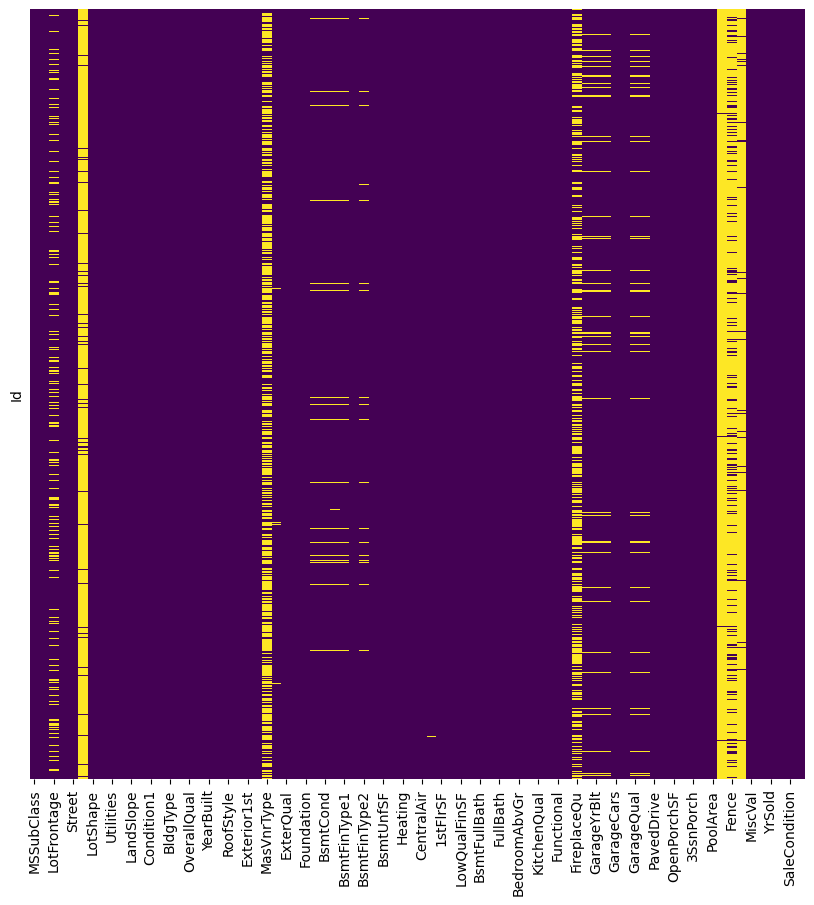

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

So many null values!

In [18]:
null_feat=[col for col in train.columns if train.isnull().sum()[col]>500]

In [19]:
train.drop(null_feat,axis=1,inplace=True)
test.drop(null_feat,axis=1,inplace=True)

In [20]:
train_X=train.drop('SalePrice',axis=1)

In [21]:
cat_columns=[col for col in train_X.columns if train_X[col].dtype=='object']
num_columns=[col for col in train_X.columns if train_X[col].dtype!='object']

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_train = imputer.fit_transform(train_X[num_columns])
imputed_test = imputer.transform(test[num_columns])

In [23]:
imputed_train=pd.DataFrame(imputed_train,columns=num_columns)
imputed_test=pd.DataFrame(imputed_test,columns=num_columns)

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputed_train_cat = imputer.fit_transform(train_X[cat_columns])
imputed_test_cat = imputer.transform(test[cat_columns])

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
encoder=OneHotEncoder(drop='first',sparse_output=False)
encoded_train=encoder.fit_transform(imputed_train_cat)
encoded_test=encoder.transform(imputed_test_cat)

In [27]:
encoded_train=pd.DataFrame(encoded_train)
encoded_test=pd.DataFrame(encoded_test)

In [28]:
imputed_train=pd.concat([imputed_train,encoded_train],axis=1).values
imputed_test=pd.concat([imputed_test,encoded_test],axis=1).values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=imputed_train
y=train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Machine Learning

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
mean_squared_error(y_test,pred)**0.5

4277467814911300.5

In [37]:
mean_absolute_error(y_test,pred)

250886240343678.94

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rfr=RandomForestRegressor(n_estimators=400)
rfr.fit(X_train,y_train)
pred=rfr.predict(X_test)

In [40]:
mean_squared_error(y_test,pred)**0.5

31508.97416517956

In [41]:
mean_absolute_error(y_test,pred)

18127.174023972606

### XGBoost

In [42]:
from xgboost import XGBRegressor

In [43]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)

In [44]:
mean_squared_error(y_test,pred)**0.5

27746.46318792608

In [45]:
mean_absolute_error(y_test,pred)

17680.43704516267

XGBoost has the best result.

## Final Submission

In [46]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(imputed_train)
scaled_test=scaler.transform(imputed_test)

In [47]:
xgb=XGBRegressor()
xgb.fit(imputed_train,train['SalePrice'])
pred=xgb.predict(imputed_test)

In [48]:
pred=pd.DataFrame(pred,columns=['SalePrice'],index=test.index)

In [49]:
pred.to_csv('final.csv')